In [9]:
from bs4 import BeautifulSoup

with open('data/codebook.html', 'r') as fp:
    html_content = fp.read()

soup = BeautifulSoup(html_content, 'html.parser')

table = soup.find_all('table')[0]
rows = table.find_all('tr')[1:]

rows[:3]

[<tr>
 <td>HML/1</td>
 <td>Prince Hamlet</td>
 <td>Hamlet</td>
 </tr>,
 <tr>
 <td>HML/2</td>
 <td>Queen Gertrude </td>
 <td>Hamlet</td>
 </tr>,
 <tr>
 <td>HML/3</td>
 <td>King Claudius</td>
 <td>Hamlet</td>
 </tr>]

In [10]:
from dataclasses import dataclass

@dataclass
class Character:
    id: str
    name: str
    work: str

characters = dict()
for row in rows:
    cols = row.find_all('td')
    char_id = cols[0].text.strip()
    char_name = cols[1].text.strip()
    char_work = cols[2].text.strip()
    character = Character(id=char_id, name=char_name, work=char_work)
    characters[char_id] = character

list(characters.values())[:3]

[Character(id='HML/1', name='Prince Hamlet', work='Hamlet'),
 Character(id='HML/2', name='Queen Gertrude', work='Hamlet'),
 Character(id='HML/3', name='King Claudius', work='Hamlet')]

In [11]:
import pandas as pd

questions = pd.read_csv('personality_statements.csv', index_col='id')
questions.head()

,low,high,statement
id,,,
BAP1,playful,serious,I strictly focus on feasibility and facts duri...
BAP2,shy,bold,I am likely to approach everyone and start con...
BAP3,cheery,sorrowful,"When I wake up on a rainy Monday morning, I fe..."
BAP4,masculine,feminine,"When choosing a scent, I gravitate towards flo..."
BAP5,charming,awkward,"When introduced to a VIP, I tend to stumble ov..."


In [12]:
data = pd.read_csv('data/characters-aggregated-scores.csv', delimiter='\t', index_col=0)
data.head()

,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,BAP10,...,BAP491,BAP492,BAP493,BAP494,BAP495,BAP496,BAP497,BAP498,BAP499,BAP500
HML/1,62.4,69.8,92.6,31.9,61.2,53.5,28.8,44.0,63.9,78.4,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
HML/2,79.1,62.2,68.5,78.1,36.9,40.3,42.6,40.4,23.3,51.8,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
HML/3,83.2,85.3,69.4,21.8,39.1,35.8,49.9,16.0,59.3,83.7,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
HML/4,72.5,65.0,67.1,28.2,66.3,47.9,30.4,18.1,34.4,78.8,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
HML/5,40.7,48.1,81.8,90.0,52.6,59.3,41.1,73.9,43.0,21.9,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


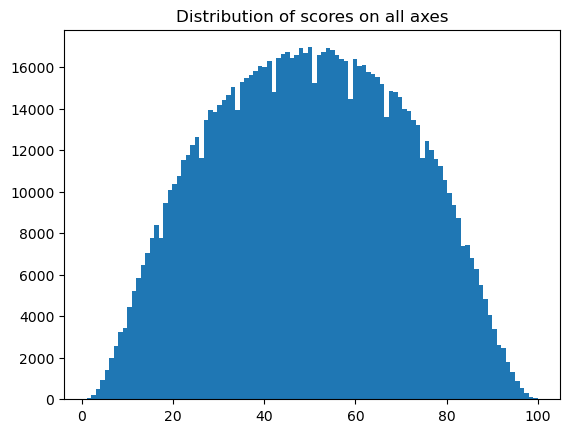

In [13]:
import matplotlib.pyplot as plt

plt.hist(data.to_numpy().flatten(), bins=100)
plt.title('Distribution of scores on all axes')
plt.show()

In [14]:
def establish_answer(score):
    if score < 20:
        return 'Strongly disagree'
    elif score < 40:
        return 'Disagree'
    elif score < 60:
        return 'Don\'t know'
    elif score < 80:
        return 'Agree'
    else:
        return 'Strongly Agree'

character_answers = data.applymap(establish_answer)
character_answers.head()

/tmp/ipykernel_14095/1875742808.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  character_answers = data.applymap(establish_answer)


,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,BAP10,...,BAP491,BAP492,BAP493,BAP494,BAP495,BAP496,BAP497,BAP498,BAP499,BAP500
HML/1,Agree,Agree,Strongly Agree,Disagree,Agree,Don't know,Disagree,Don't know,Agree,Agree,...,Disagree,Agree,Don't know,Don't know,Agree,Strongly disagree,Don't know,Don't know,Strongly Agree,Strongly disagree
HML/2,Agree,Agree,Agree,Agree,Disagree,Don't know,Don't know,Don't know,Disagree,Don't know,...,Don't know,Disagree,Strongly Agree,Agree,Don't know,Agree,Disagree,Agree,Disagree,Agree
HML/3,Strongly Agree,Strongly Agree,Agree,Disagree,Disagree,Disagree,Don't know,Strongly disagree,Don't know,Strongly Agree,...,Strongly disagree,Disagree,Don't know,Agree,Agree,Disagree,Disagree,Don't know,Agree,Don't know
HML/4,Agree,Agree,Agree,Disagree,Agree,Don't know,Disagree,Strongly disagree,Disagree,Agree,...,Disagree,Disagree,Agree,Agree,Agree,Don't know,Disagree,Don't know,Strongly Agree,Don't know
HML/5,Don't know,Don't know,Strongly Agree,Strongly Agree,Don't know,Don't know,Don't know,Agree,Don't know,Disagree,...,Disagree,Don't know,Agree,Agree,Agree,Strongly disagree,Don't know,Don't know,Strongly Agree,Disagree


In [15]:
def establish_trait(trait_axis_id, answer):
    try:
        trait_data = questions.loc[trait_axis_id]
    except Exception:
        return None
    if answer == "Strongly Disagree" or answer == "Disagree":
        return trait_data["low"]
    elif answer == "Agree" or answer == "Strongly Agree":
        return trait_data["high"]
    else:
        return None

def establish_relation(answer):
    match answer:
        case "Strongly Disagree":
            return 'definitely is not'
        case "Disagree":
            return 'is not'
        case "Agree":
            return 'is'
        case "Strongly Agree":
            return 'definitely is'
        case _:
            return 'unknown'

low_answers = ['Strongly Disagree', 'Disagree']
high_answers = ['Agree', 'Strongly Agree']
all_answers = ['Strongly Disagree', 'Disagree', "Don't know", 'Agree', 'Strongly Agree']

def write_graph(filename, character_answers, questions):
    with open(filename, 'w', encoding='utf-8') as fp:
        for index, row in character_answers.iterrows():
            character_name = characters[index].name
            for trait_axis_id, answer in row[1:].items():
                trait = establish_trait(trait_axis_id, answer)
                if trait is None:
                    continue
                relation = establish_relation(answer)
                fp.write(f'<C:{character_name}><{relation}><T:{trait}>.\n')

        for qid, qrow in questions.iterrows():
            low = qrow['low']
            high = qrow['high']
            fp.write(f'<Q:{qid}><probes><T:{low}>.\n')
            fp.write(f'<Q:{qid}><probes><T:{high}>.\n')

        for qid, qrow in questions.iterrows():
            low = qrow['low']
            high = qrow['high']
            for a in low_answers:
                fp.write(f'<A:{a}:{qid}><indicates><T:{low}>.\n')
            for a in high_answers:
                fp.write(f'<A:{a}:{qid}><indicates><T:{high}>.\n')

write_graph("graph.txt", character_answers, questions)

In [16]:
small_character_answers = character_answers.sample(frac=0.1)
small_questions = questions.sample(frac=0.1)

write_graph("small-graph.txt", small_character_answers, small_questions)